                                                                                                         Saurabh Bajoria
                                                                                                         UBid: sbajoria
                                                                                                         Person no:50208005

**CSE 4/587 Data Intensive Computing**
====================
***LAB3: ALGORITHMS AND MODELS FOR DATA ANALYSIS, LEARNING AND PREDICTION***
---------------------------------------
                                                                                                       

*Classical package: H. Wickham’s ggplot2 Vignette*
--------------------------------------


 

- Installing and importing Libraries required

In [1]:
install.packages("ggrepel",repos="https://cran.r-project.org/") 
install.packages("scales",repos="https://cran.r-project.org/") 
library(ggplot2)
library(ggrepel)
library(scales)
library(tidyr)

Installing package into 'C:/Users/Saurabh/Documents/R/win-library/3.3'
(as 'lib' is unspecified)


package 'ggrepel' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Saurabh\AppData\Local\Temp\RtmpmyoN2G\downloaded_packages


Installing package into 'C:/Users/Saurabh/Documents/R/win-library/3.3'
(as 'lib' is unspecified)


package 'scales' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'scales'"


The downloaded binary packages are in
	C:\Users\Saurabh\AppData\Local\Temp\RtmpmyoN2G\downloaded_packages


Warning message:
"package 'ggrepel' was built under R version 3.3.3"

- Importing the CSV for hosing prices

In [2]:
housing <- read.csv("landdata-states.csv")
head(housing[1:5])

State,region,Date,Home.Value,Structure.Cost
AK,West,2010.25,224952,160599
AK,West,2010.50,225511,160252
AK,West,2009.75,225820,163791
AK,West,2010.00,224994,161787
AK,West,2008.00,234590,155400
AK,West,2008.25,233714,157458


**ggplot2 VS Base for simple graphs**

- Base graphics histogram example

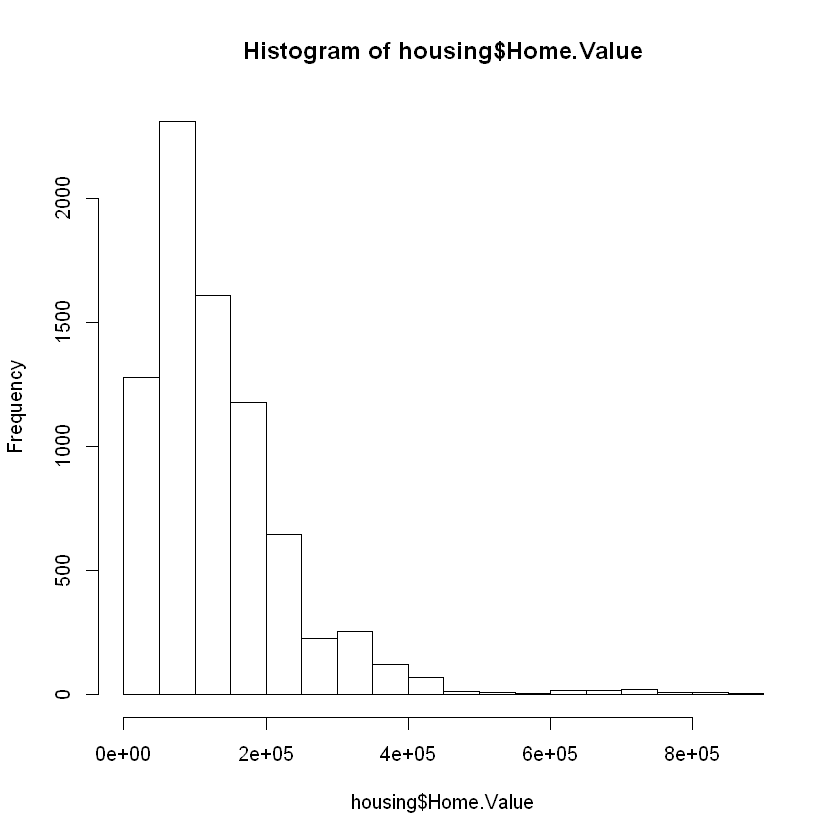

In [3]:
hist(housing$Home.Value)

- ggplot2 histogram example

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


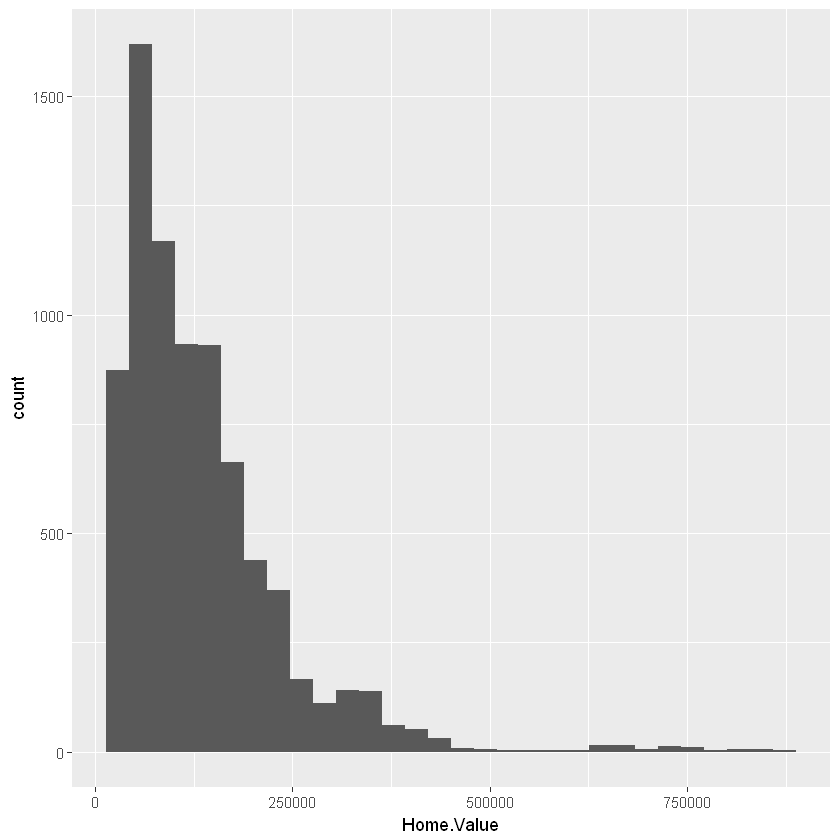

In [4]:
ggplot(housing, aes(x = Home.Value)) +
  geom_histogram()

**ggplot2 Base graphics VS ggplot for more complex graphs**

- Base colored scatter plot example

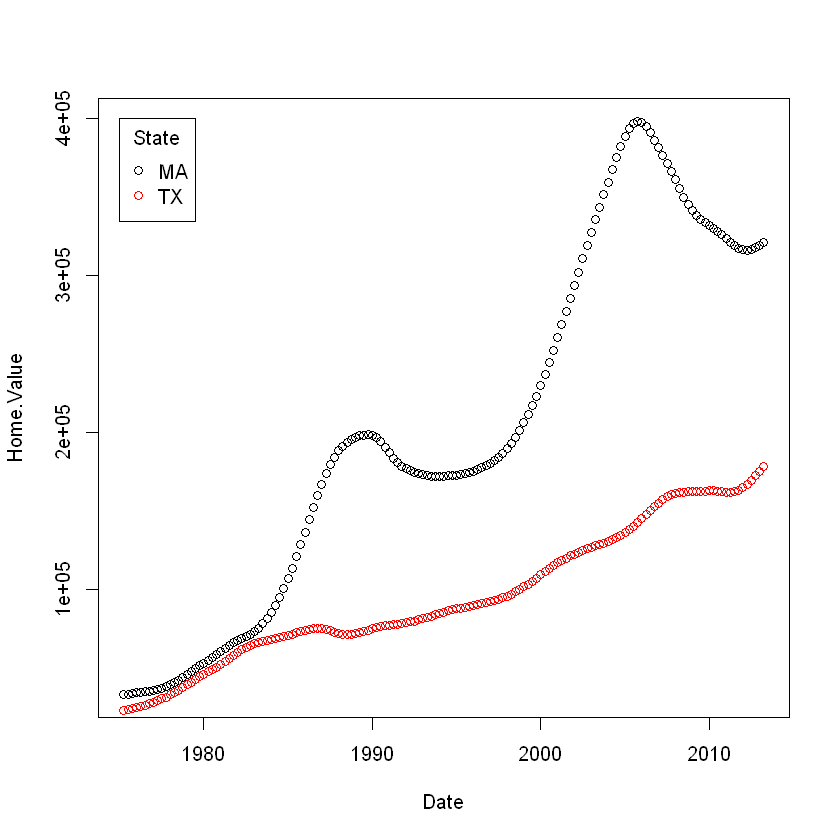

In [5]:
plot(Home.Value ~ Date,
     data=subset(housing, State == "MA"))
points(Home.Value ~ Date, col="red",
       data=subset(housing, State == "TX"))
legend(1975, 400000,
       c("MA", "TX"), title="State",
       col=c("black", "red"),
       pch=c(1, 1))

- ggplot2 colored scatter plot example

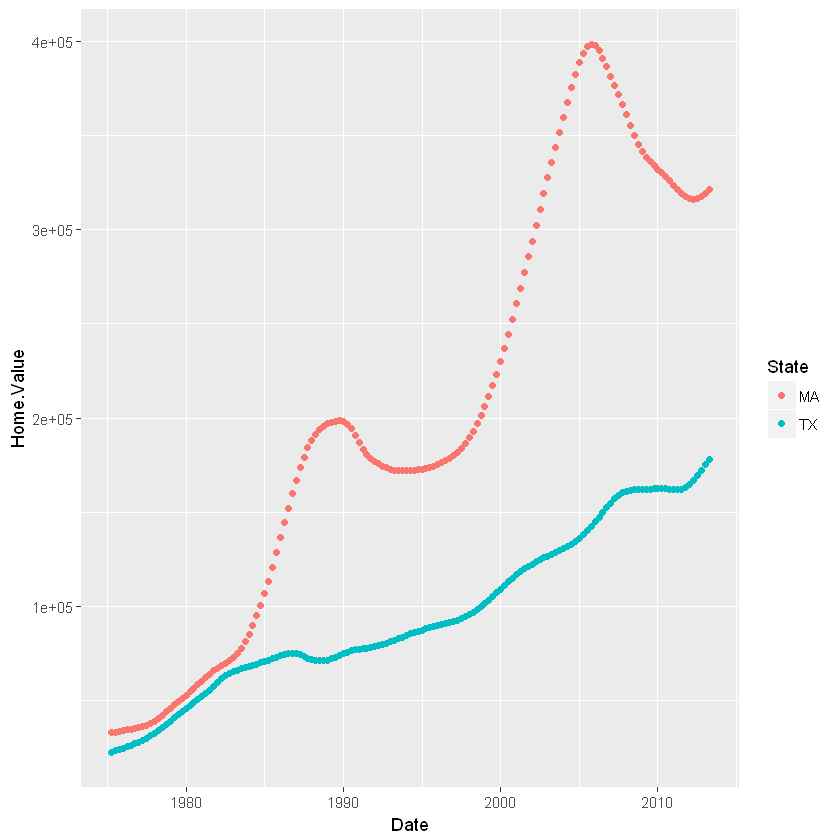

In [6]:
ggplot(subset(housing, State %in% c("MA", "TX")),
       aes(x=Date,
           y=Home.Value,
           color=State))+
  geom_point()

**Geometric Objects And Aesthetics**

- Aesthetic Mapping
 - position (i.e., on the x and y axes)
 - color ("outside" color)
 - fill ("inside" color)
 - shape (of points)
 - linetype
 - size

- Geometric Objects (geom)
 - List of available geometric objects

In [7]:
help.search("geom_", package = "ggplot2")

starting httpd help server ... done


**Points (Scatterplot)**

- Land Value Vs Structural cost

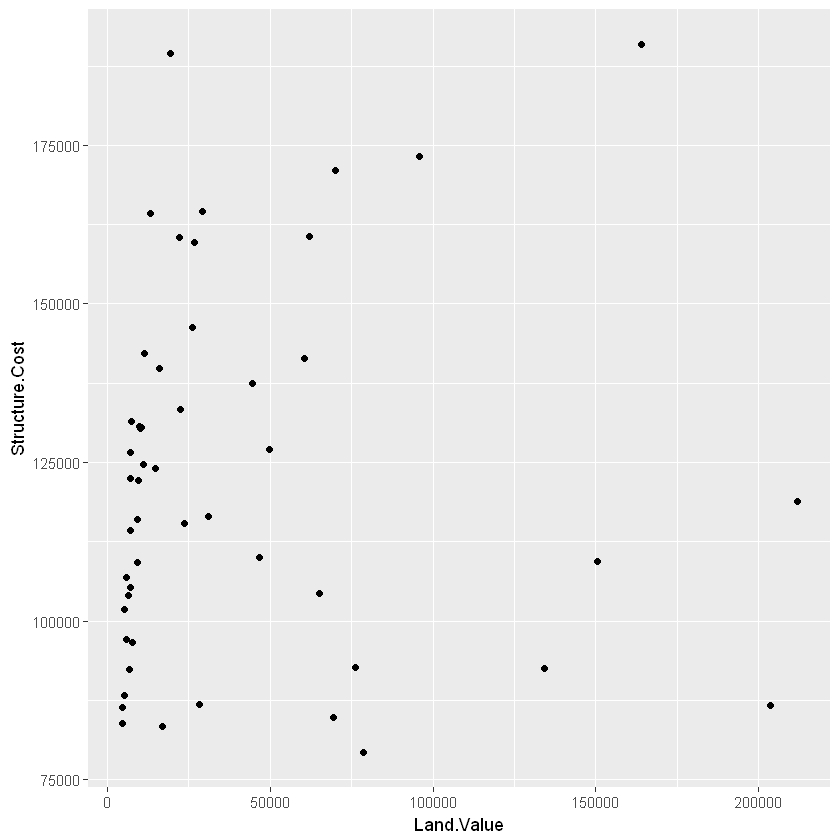

In [8]:
hp2001Q1 <- subset(housing, Date == 2001.25) 
ggplot(hp2001Q1,
       aes(y = Structure.Cost, x = Land.Value)) +
  geom_point()

- Log of Land Value Vs Structural Cost

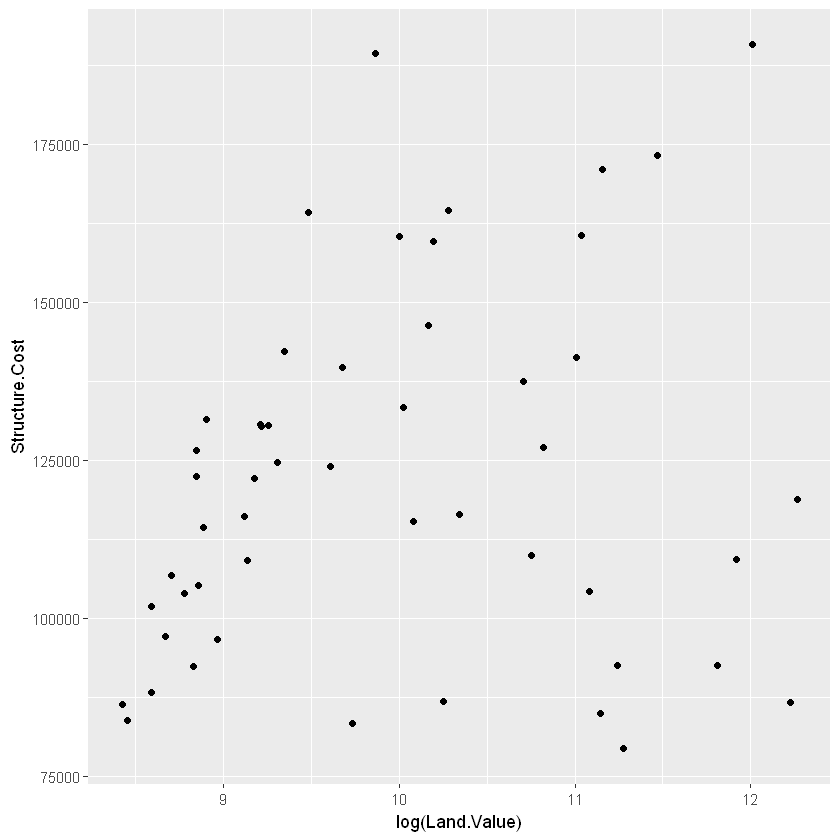

In [9]:
ggplot(hp2001Q1,
       aes(y = Structure.Cost, x = log(Land.Value))) +
  geom_point()

**Lines(Prediction Line)**

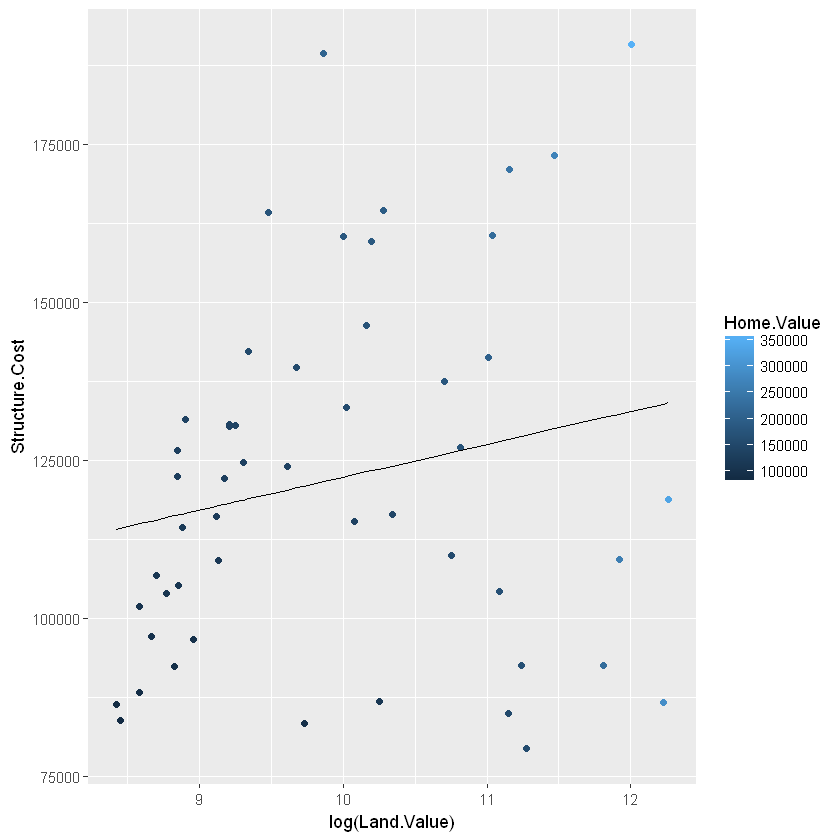

In [10]:
hp2001Q1$pred.SC <- predict(lm(Structure.Cost ~ log(Land.Value), data = hp2001Q1))

p1 <- ggplot(hp2001Q1, aes(x = log(Land.Value), y = Structure.Cost))

p1 + geom_point(aes(color = Home.Value)) +
  geom_line(aes(y = pred.SC))

**Smoothers**

`geom_smooth()` using method = 'loess'


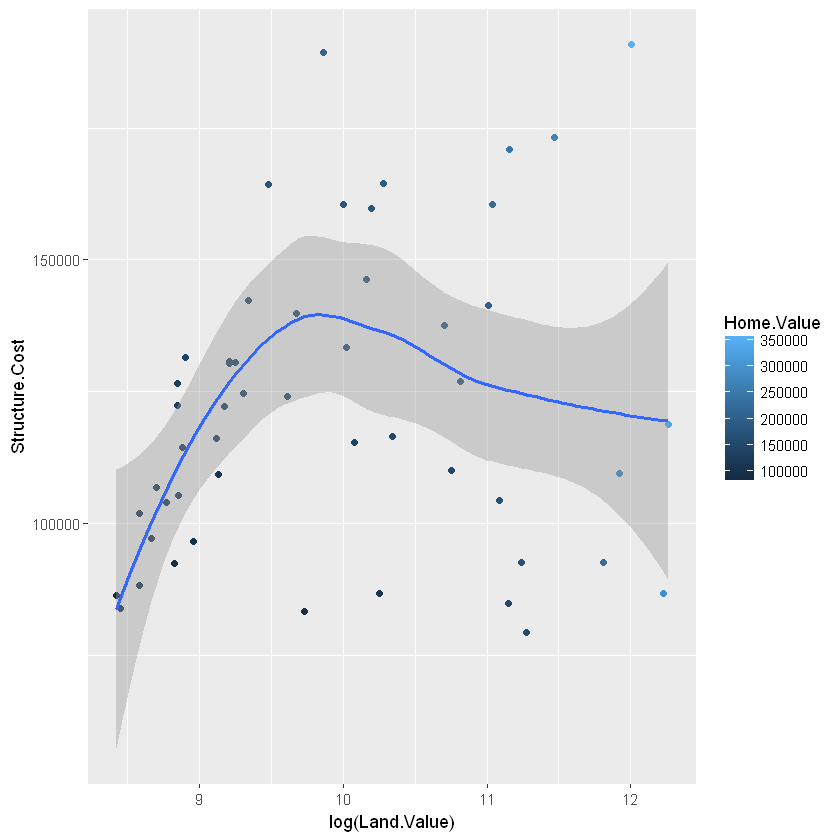

In [11]:
p1 +
  geom_point(aes(color = Home.Value)) +
  geom_smooth()

**Text (Label Points)**

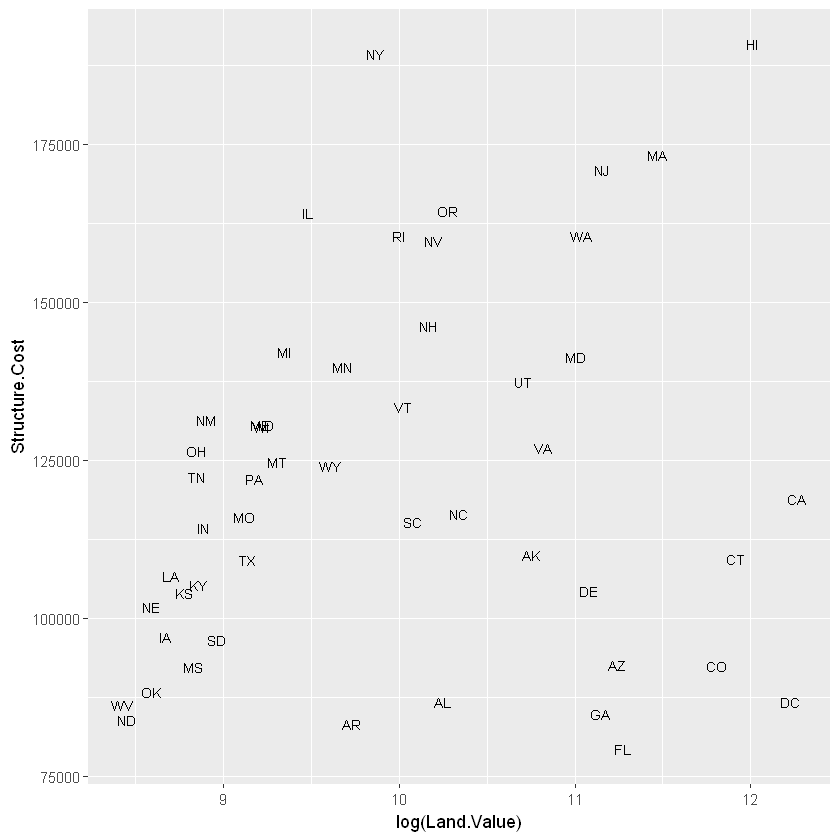

In [12]:
p1 + 
  geom_text(aes(label=State), size = 3)

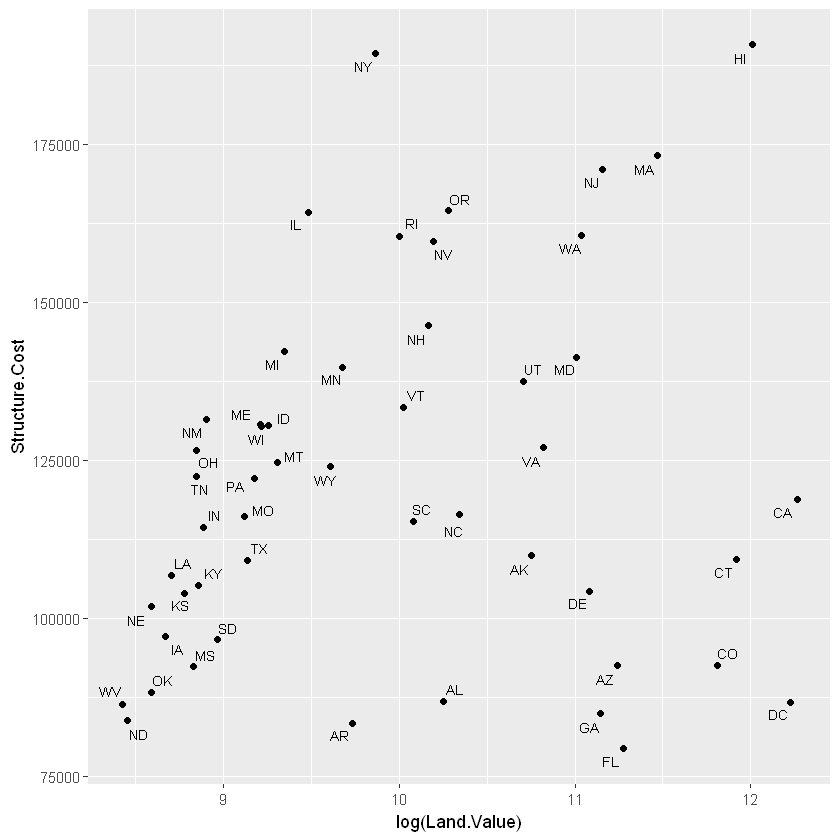

In [13]:
p1 + 
  geom_point() + 
  geom_text_repel(aes(label=State), size = 3)

**Aesthetic Mapping VS Assignment**

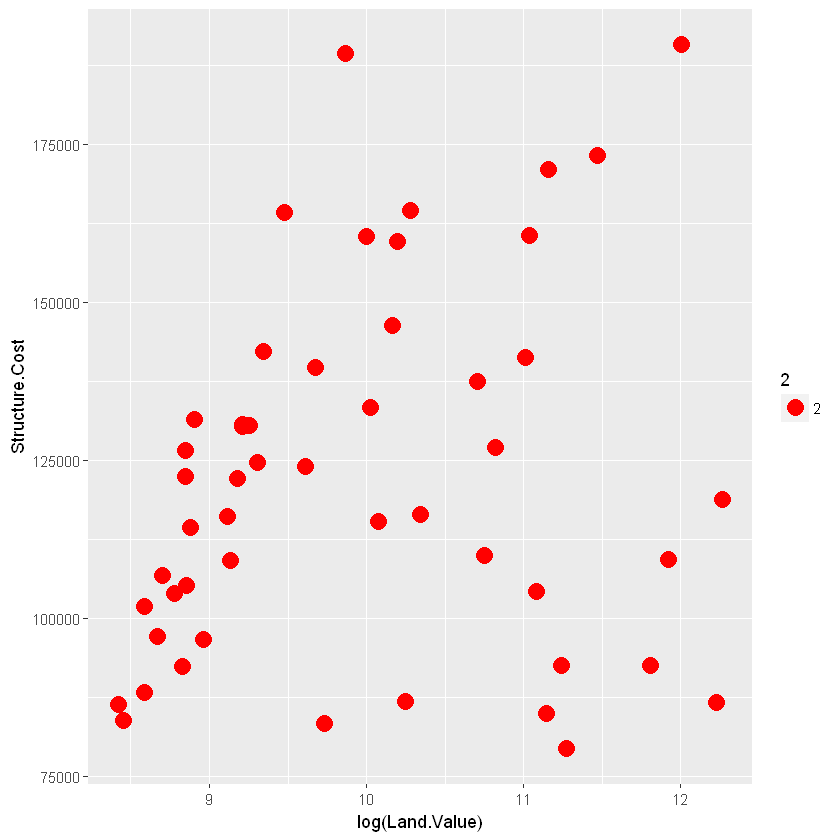

In [14]:
p1 +
  geom_point(aes(size = 2),# incorrect! 2 is not a variable
             color="red") # this is fine -- all points red

**Mapping Variables To Other Aesthetics**

Warning message:
"Removed 1 rows containing missing values (geom_point)."

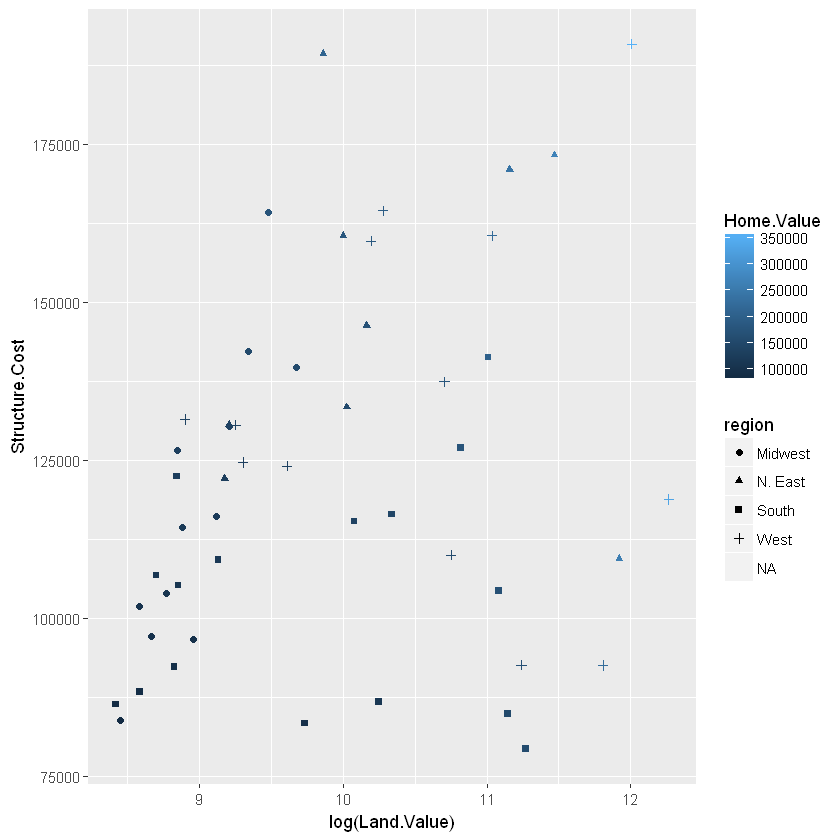

In [15]:
p1 +
  geom_point(aes(color=Home.Value, shape = region))

**Statistical Transformations**

In [16]:
args(geom_histogram)
args(stat_bin)

function (mapping = NULL, data = NULL, stat = "bin", position = "stack", 
    ..., binwidth = NULL, bins = NULL, na.rm = FALSE, show.legend = NA, 
    inherit.aes = TRUE) 
NULL

function (mapping = NULL, data = NULL, geom = "bar", position = "stack", 
    ..., binwidth = NULL, bins = NULL, center = NULL, boundary = NULL, 
    breaks = NULL, closed = c("right", "left"), pad = FALSE, 
    na.rm = FALSE, show.legend = NA, inherit.aes = TRUE) 
NULL

**Setting Statistical Transformation Arguments**

 - without binwidth

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


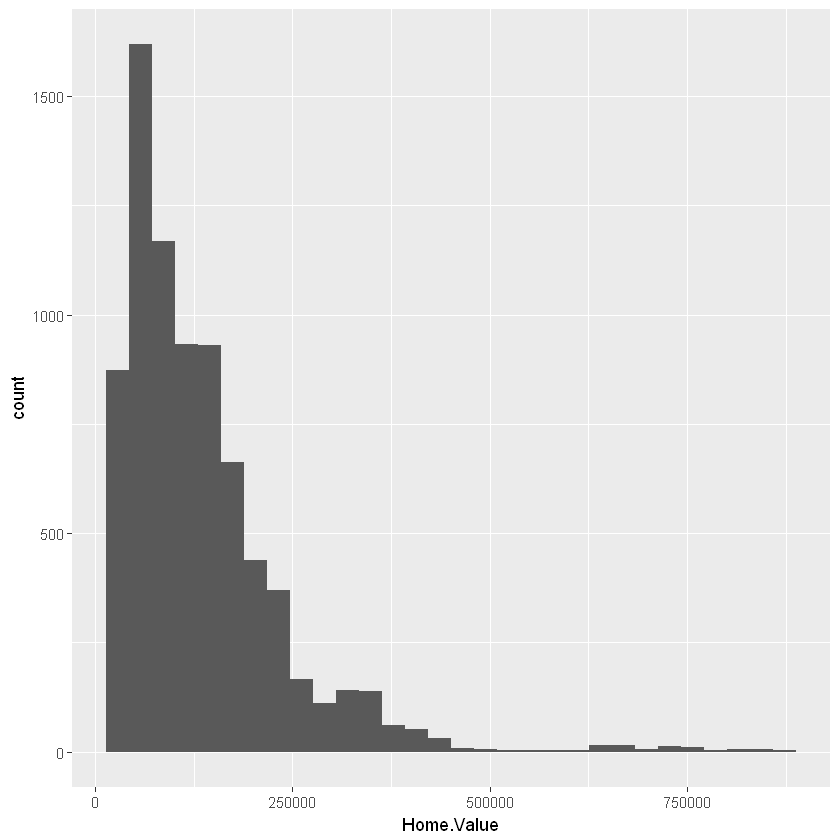

In [17]:
p2 <- ggplot(housing, aes(x = Home.Value))
p2 + geom_histogram()

 - with binwidth

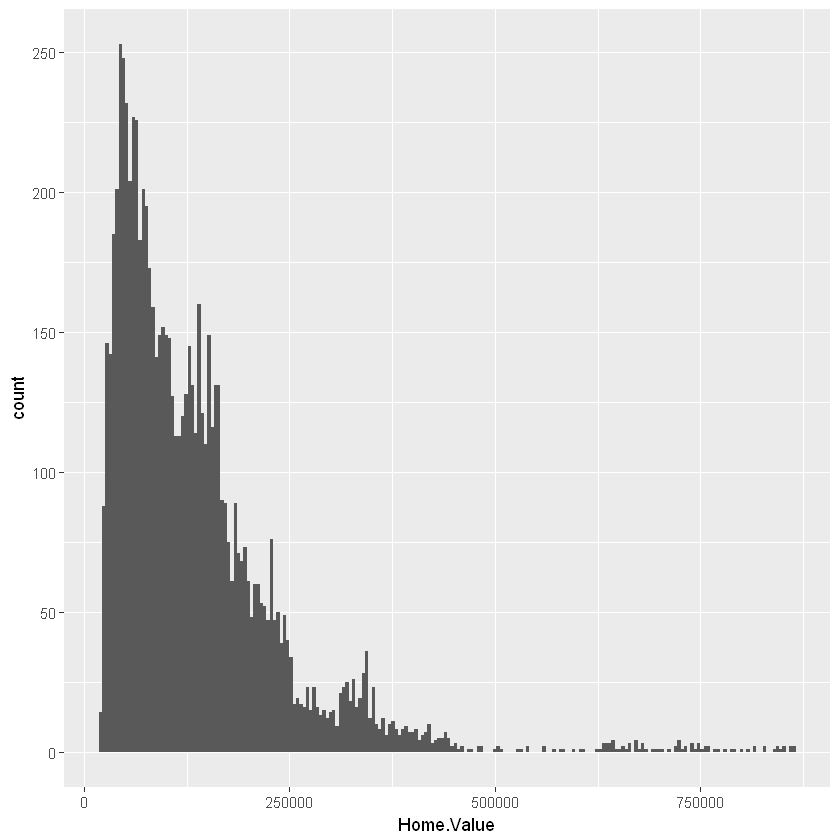

In [18]:
p2 + geom_histogram(stat = "bin", binwidth=4000)

**Changing The Statistical Transformation**

In [19]:
housing.sum <- aggregate(housing["Home.Value"], housing["State"], FUN=mean)
rbind(head(housing.sum), tail(housing.sum))

,State,Home.Value
1,AK,147385.14
2,AL,92545.22
3,AR,82076.84
4,AZ,140755.59
5,CA,282808.08
6,CO,158175.99
46,VA,155391.44
47,VT,132394.60
48,WA,178522.58
49,WI,108359.45


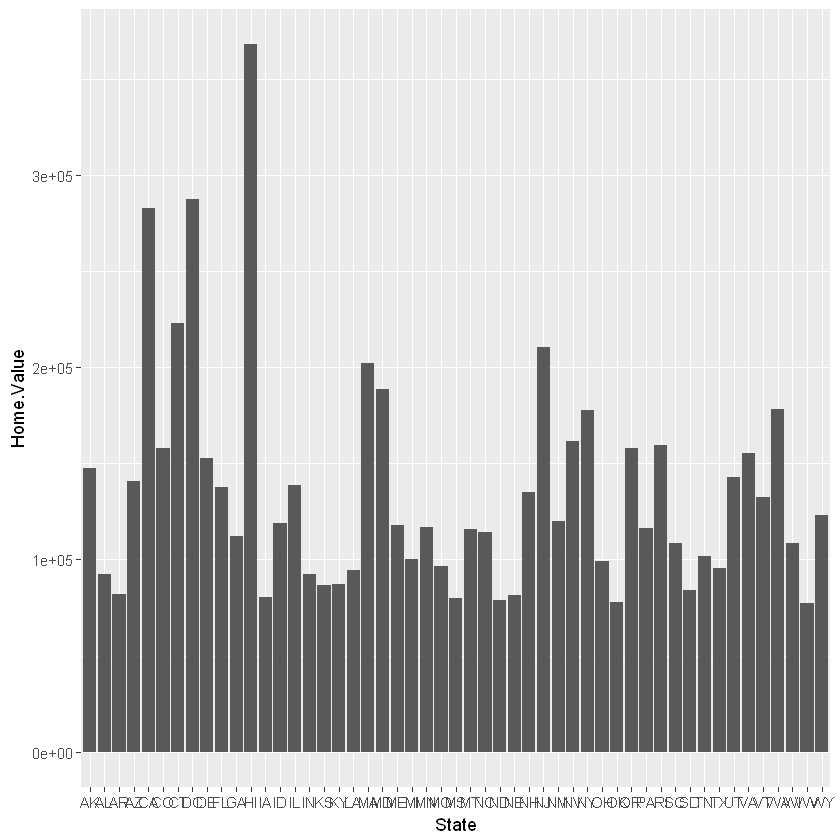

In [20]:
ggplot(housing.sum, aes(x=State, y=Home.Value)) + 
  geom_bar(stat="identity")

**Scales**

 - Scale Modification Examples

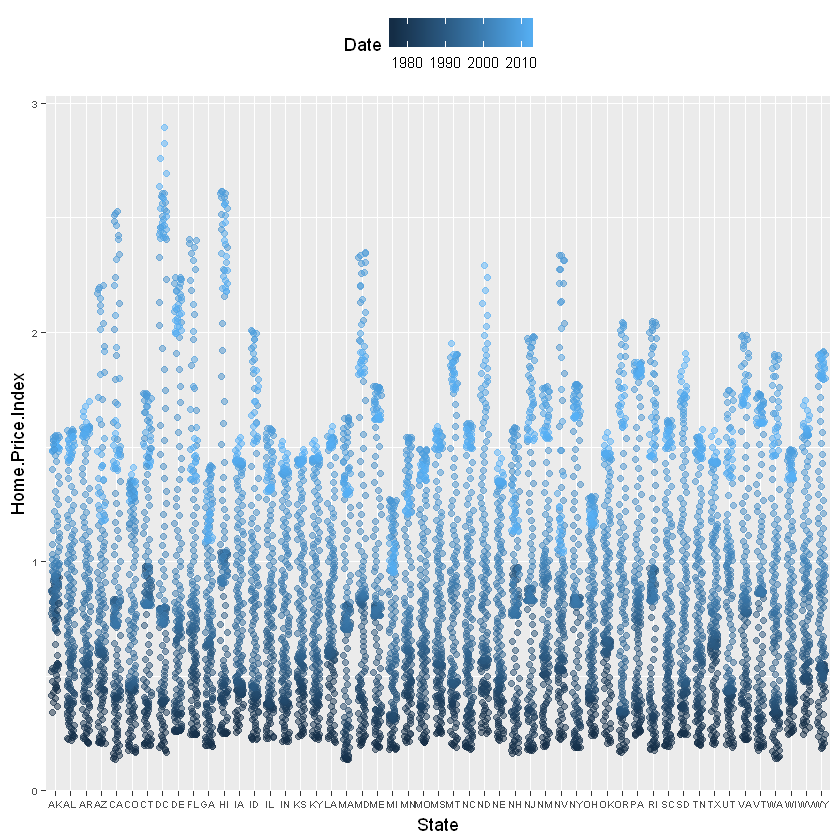

In [21]:
p3 <- ggplot(housing,
             aes(x = State,
                 y = Home.Price.Index)) + 
        theme(legend.position="top",
              axis.text=element_text(size = 6))
(p4 <- p3 + geom_point(aes(color = Date),
                       alpha = 0.5,
                       size = 1.5,
                       position = position_jitter(width = 0.25, height = 0)))

- modify the breaks for the x axis and color scales

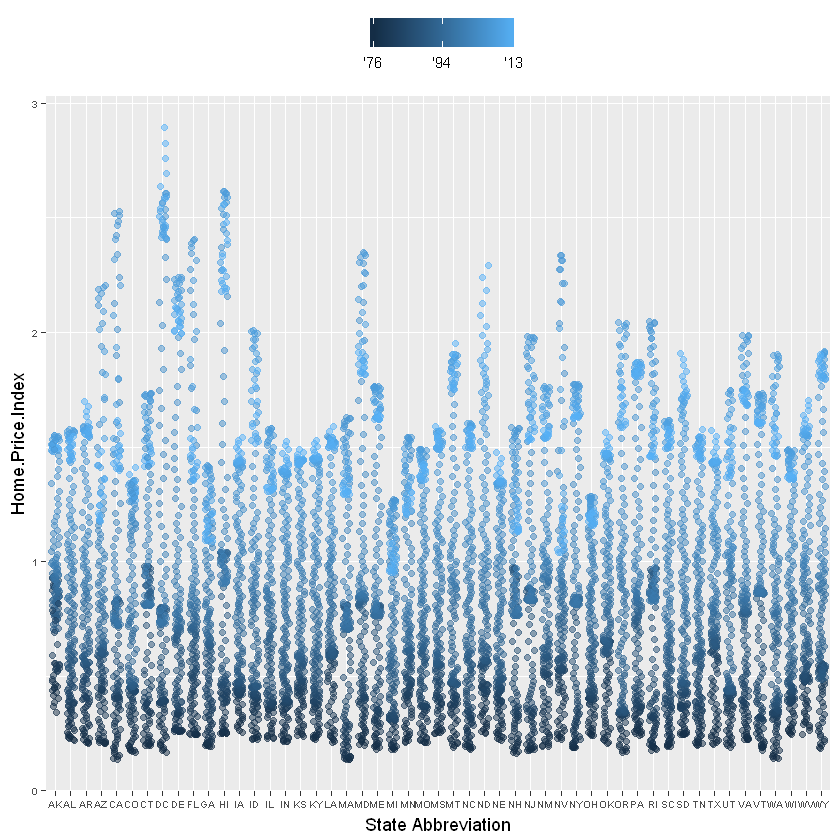

In [22]:
p4 + scale_x_discrete(name="State Abbreviation") +
  scale_color_continuous(name="",
                         breaks = c(1976, 1994, 2013),
                         labels = c("'76", "'94", "'13"))

- change the low and high values to blue and red

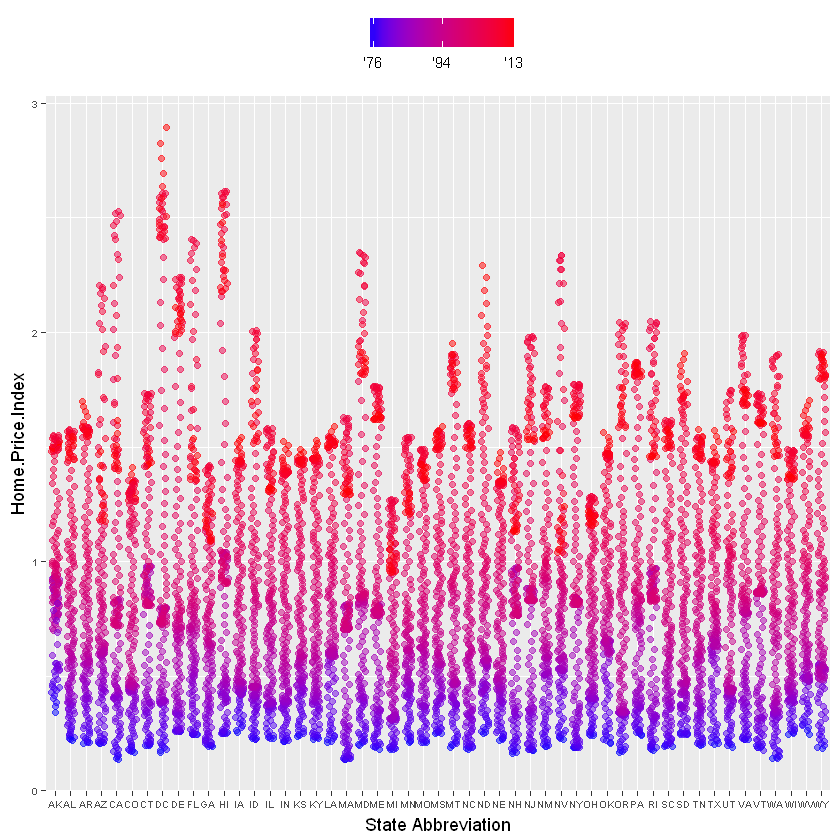

In [23]:
p4 +
  scale_x_discrete(name="State Abbreviation") +
  scale_color_continuous(name="",
                         breaks = c(1976, 1994, 2013),
                         labels = c("'76", "'94", "'13"),
                         low = "blue", high = "red")

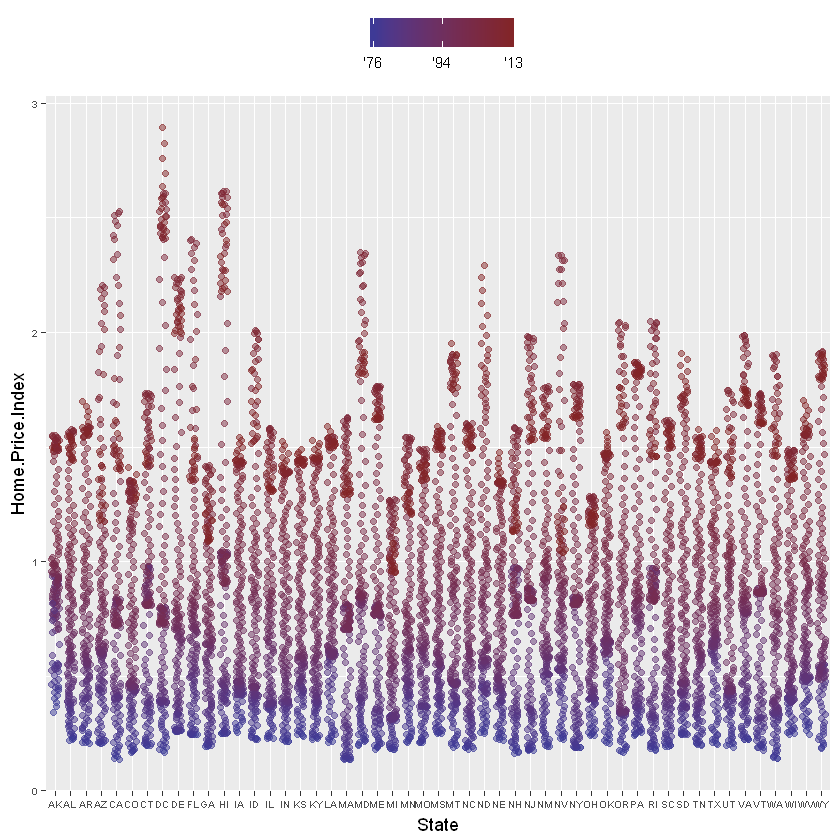

In [24]:
p4 +
  scale_color_continuous(name="",
                         breaks = c(1976, 1994, 2013),
                         labels = c("'76", "'94", "'13"),
                         low = muted("blue"), high = muted("red"))

**Using different color scales**

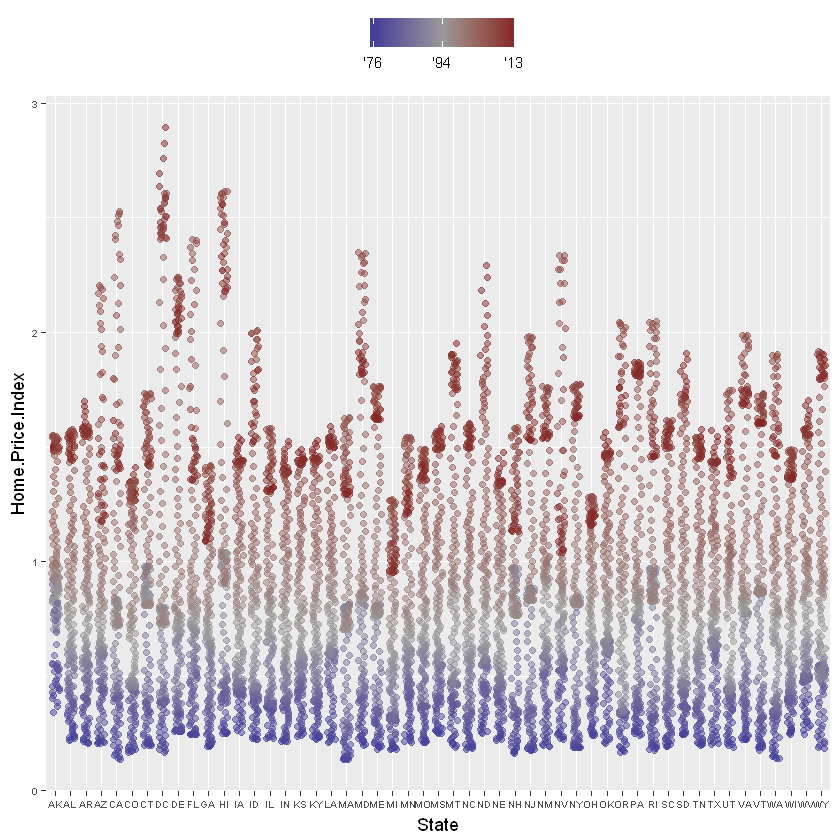

In [25]:
p4 +
  scale_color_gradient2(name="",
                        breaks = c(1976, 1994, 2013),
                        labels = c("'76", "'94", "'13"),
                        low = muted("blue"),
                        high = muted("red"),
                        mid = "gray60",
                        midpoint = 1994)

**What is the trend in housing prices in each state?**

 - map State to color

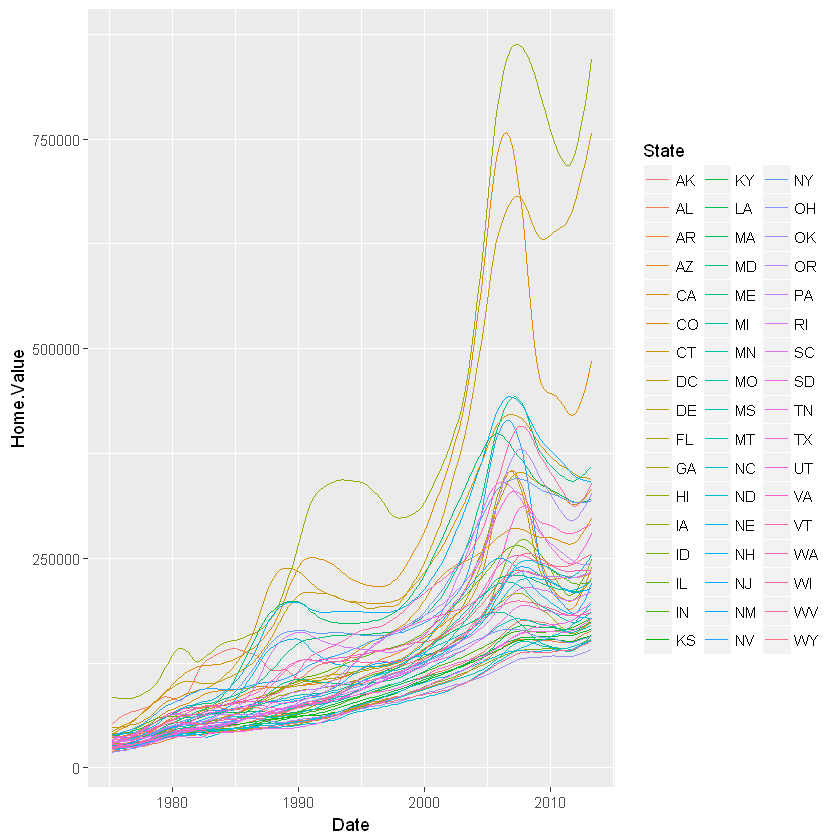

In [26]:
p5 <- ggplot(housing, aes(x = Date, y = Home.Value))
p5 + geom_line(aes(color = State))

- Using Faceting

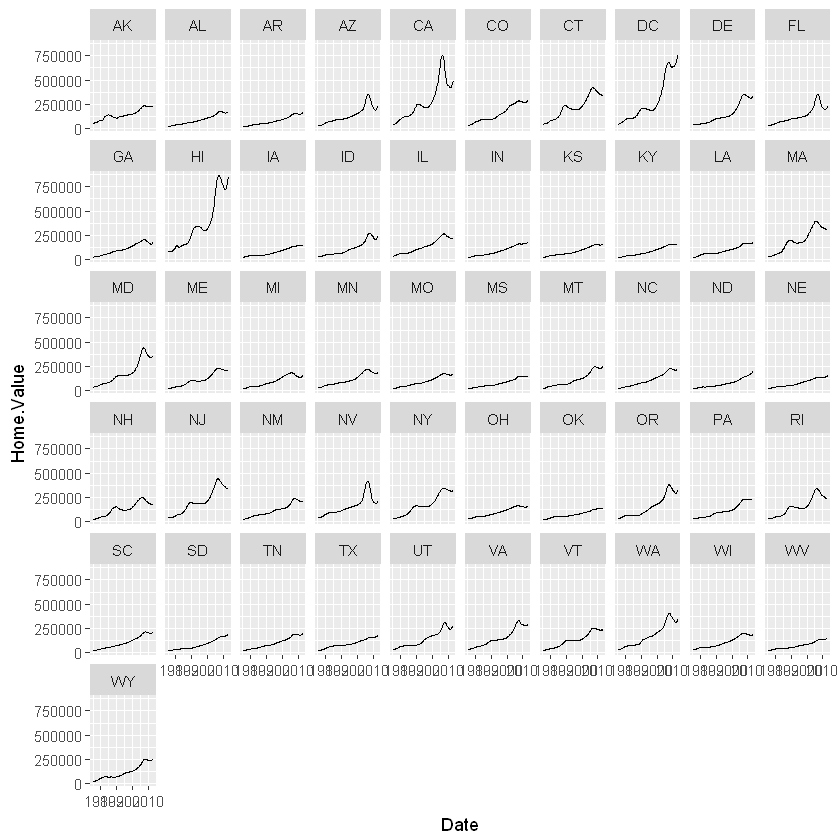

In [27]:
(p5 <- p5 + geom_line() +
   facet_wrap(~State, ncol = 10))

**Themes**

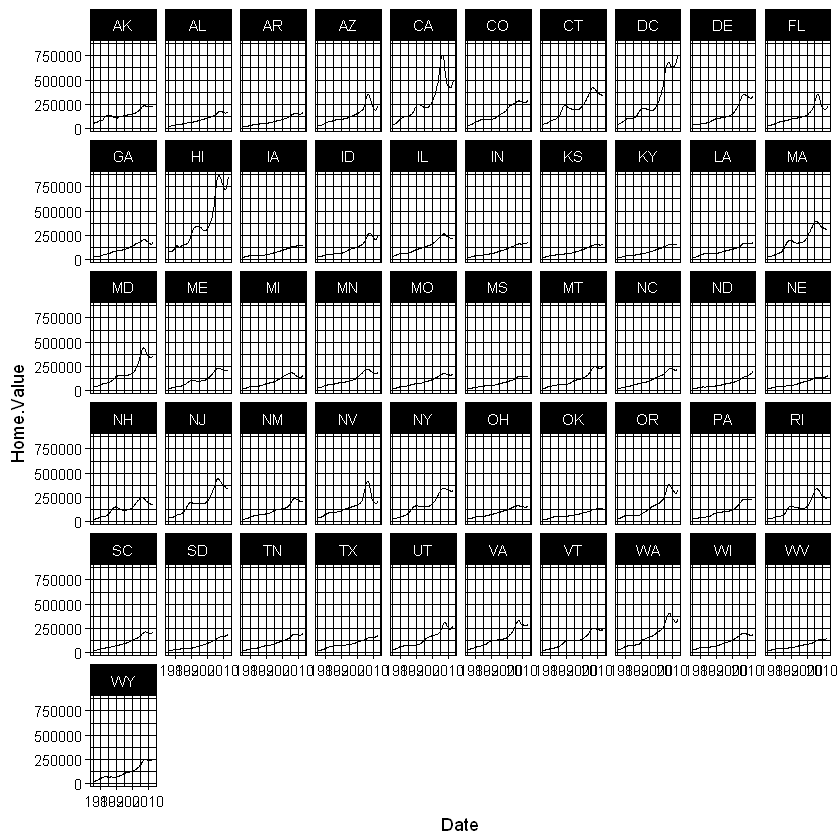

In [28]:
p5 + theme_linedraw()

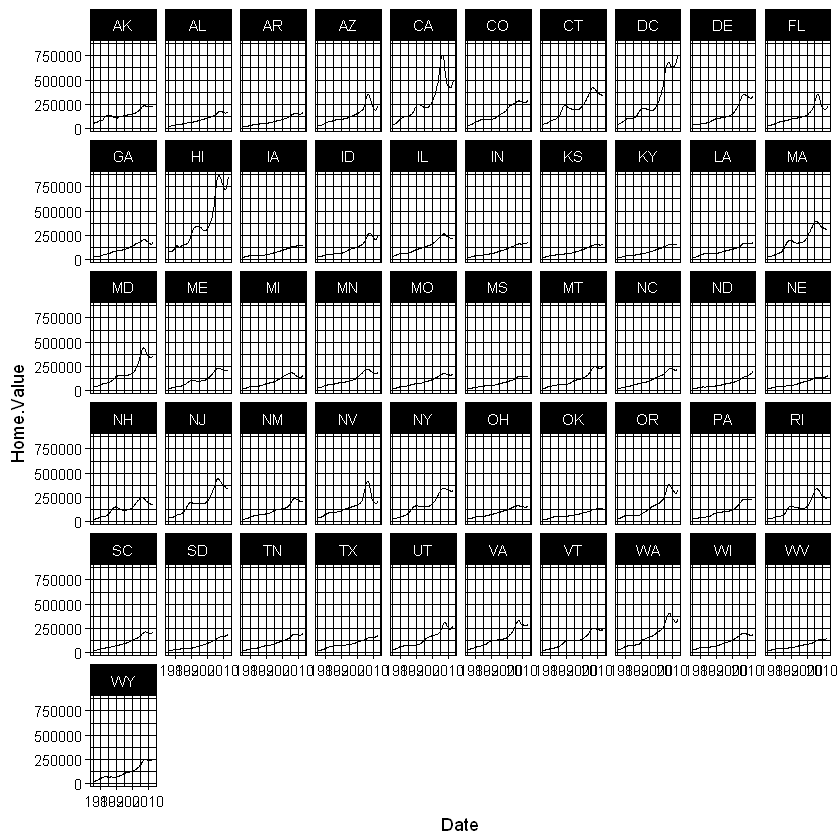

In [29]:
p5 + theme_linedraw()

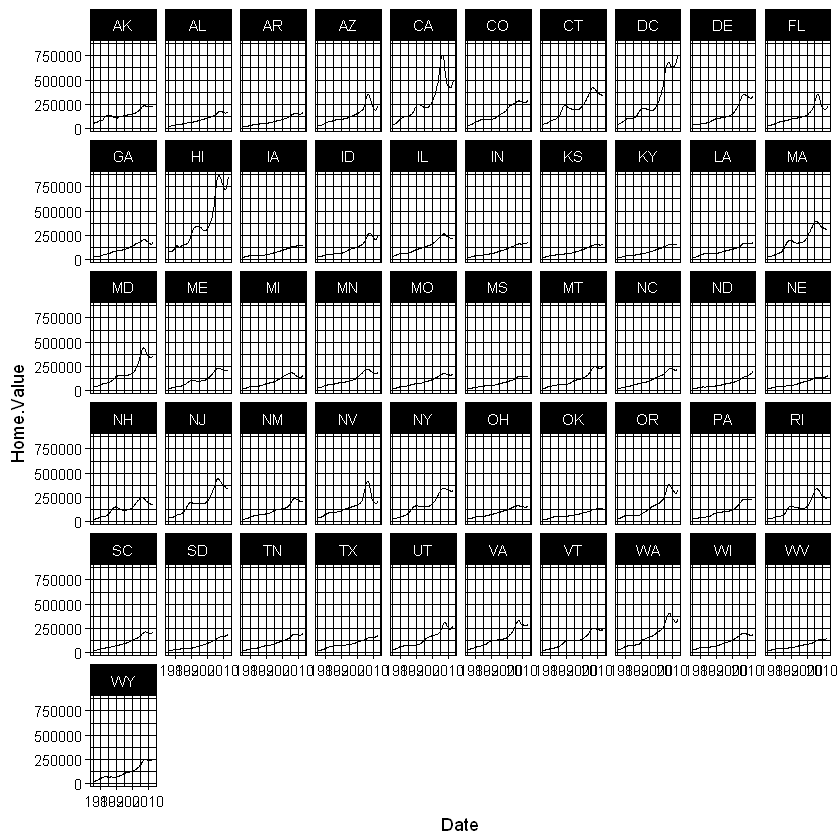

In [30]:
p5 + theme_linedraw()

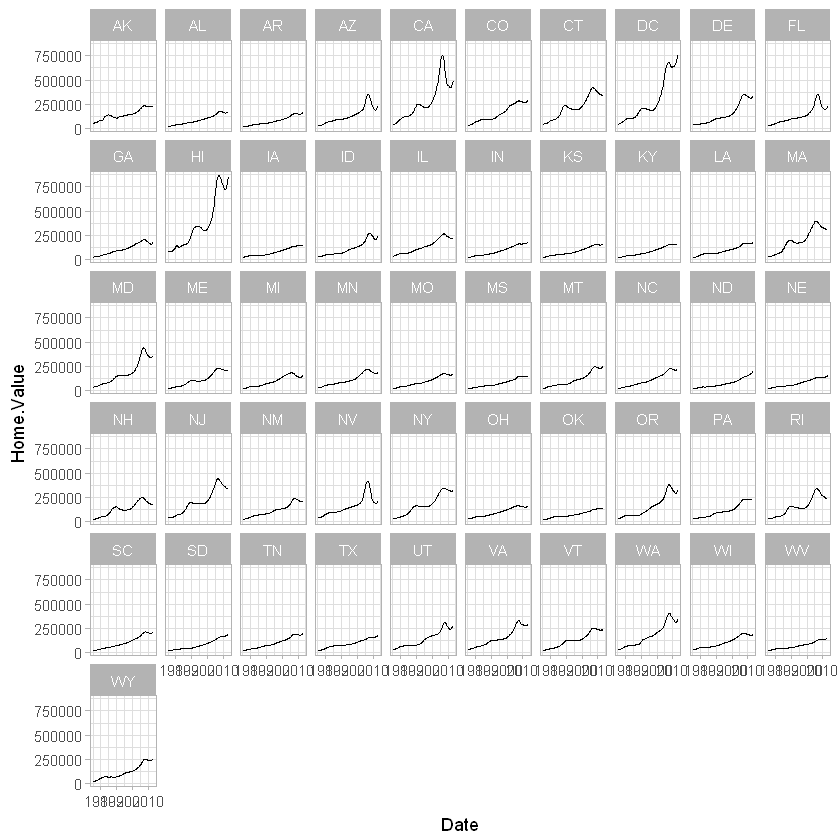

In [31]:
p5 + theme_light()

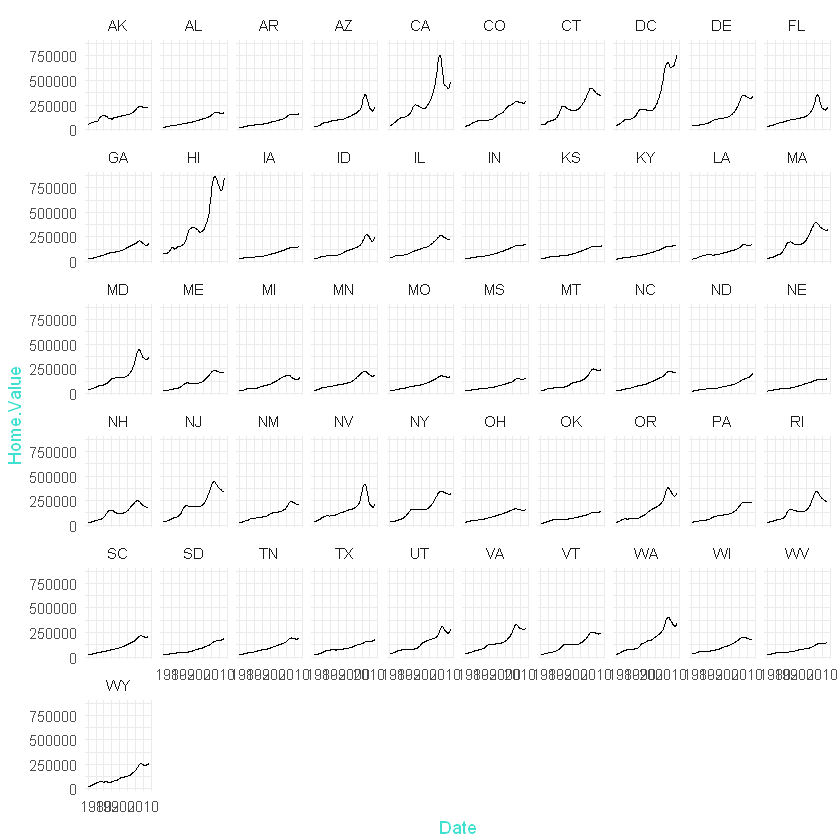

In [32]:
p5 + theme_minimal() +
  theme(text = element_text(color = "turquoise"))

**Creating and saving new themes**

Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call(L_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"Warning message in grid.Call.graphics(L_text, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"

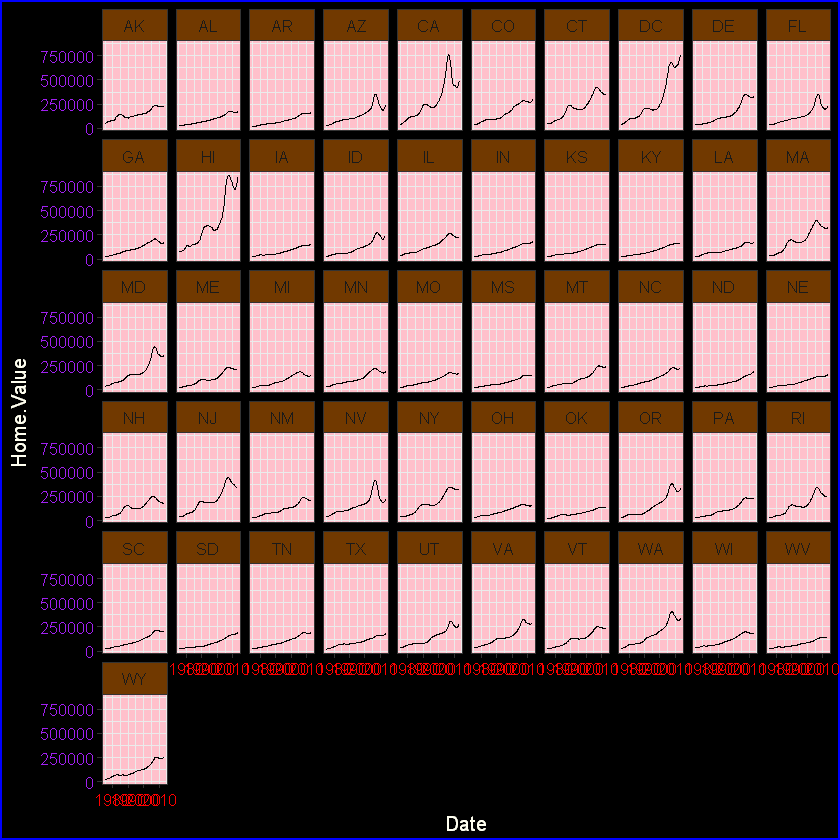

In [33]:
theme_new <- theme_bw() +
  theme(plot.background = element_rect(size = 1, color = "blue", fill = "black"),
        text=element_text(size = 12, family = "Serif", color = "ivory"),
        axis.text.y = element_text(colour = "purple"),
        axis.text.x = element_text(colour = "red"),
        panel.background = element_rect(fill = "pink"),
        strip.background = element_rect(fill = muted("orange")))

p5 + theme_new


**Wrong**

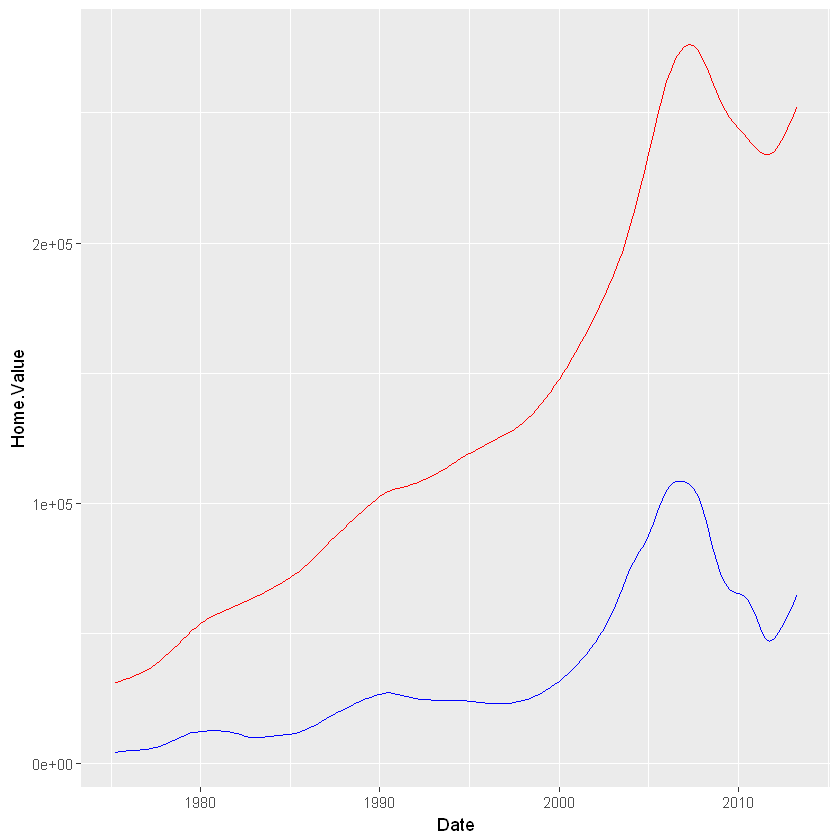

In [34]:
housing.byyear <- aggregate(cbind(Home.Value, Land.Value) ~ Date, data = housing, mean)
ggplot(housing.byyear,
       aes(x=Date)) +
  geom_line(aes(y=Home.Value), color="red") +
  geom_line(aes(y=Land.Value), color="blue")

**Right**

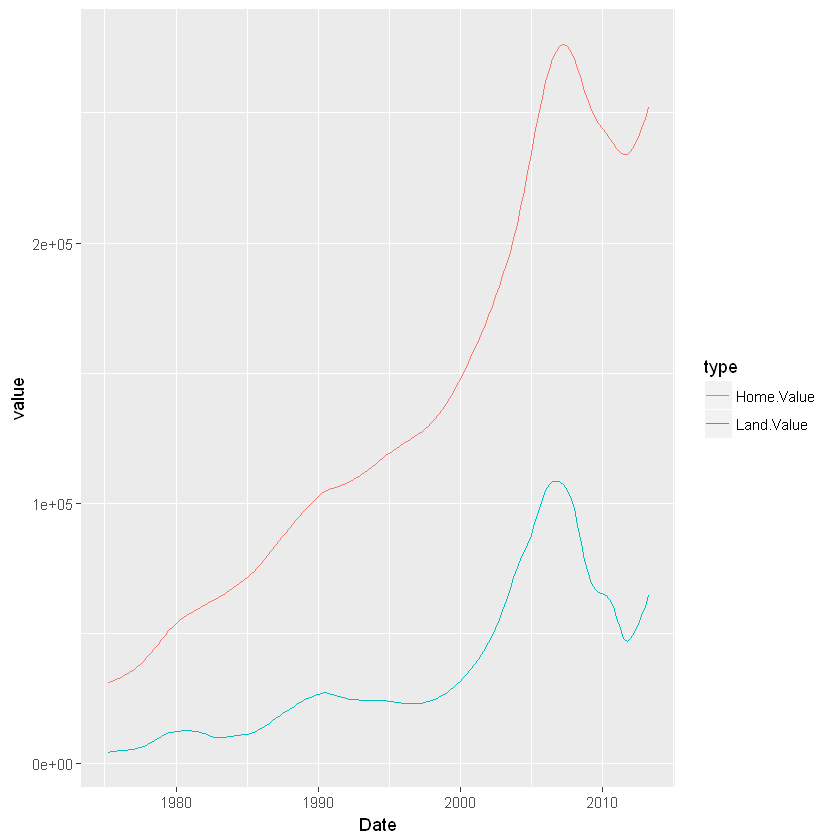

In [35]:

home.land.byyear <- gather(housing.byyear,
                           value = "value",
                           key = "type",
                           Home.Value, Land.Value)
ggplot(home.land.byyear,
       aes(x=Date,
           y=value,
           color=type)) +
  geom_line()